# ANALYSING STOPS DATASET

Not much information was received for the stop dataset regarding description of attributes. I only inferred what each 
attribute meant by their titles. The dataset is a record of bus stops across the UK. Their status are labelled active or
deleted.

# SECTION A

In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

In [2]:
#reading in stops dataframe from ALL FILES notebook file
%store -r stop

In [3]:
#reading in dataframe from LICENCE notebook file
%store -r complete_wards

In [4]:
#checking for columns in dataframe
stop.columns

Index([u'ATCOCode', u'NaptanCode', u'PlateCode', u'CleardownCode',
       u'CommonName', u'CommonNameLang', u'ShortCommonName',
       u'ShortCommonNameLang', u'Landmark', u'LandmarkLang', u'Street',
       u'StreetLang', u'Crossing', u'CrossingLang', u'Indicator',
       u'IndicatorLang', u'Bearing', u'NptgLocalityCode', u'LocalityName',
       u'ParentLocalityName', u'GrandParentLocalityName', u'Town', u'TownLang',
       u'Suburb', u'SuburbLang', u'LocalityCentre', u'GridType', u'Easting',
       u'Northing', u'Longitude', u'Latitude', u'StopType', u'BusStopType',
       u'TimingStatus', u'DefaultWaitTime', u'Notes', u'NotesLang',
       u'AdministrativeAreaCode', u'CreationDateTime', u'ModificationDateTime',
       u'RevisionNumber', u'Modification', u'Status'],
      dtype='object')

In [5]:
#creating geometry column to contain points of geometry
stop['geometry'] = [Point(xy) for xy in zip(stop.Longitude, stop.Latitude)]
#assigning CRS to the geodataframe 
stop_geo = gpd.GeoDataFrame(stop, crs={'init' :'epsg:4326'})
#setting CRS to same reference for both dataframes
stop_geo = stop_geo.to_crs(complete_wards.crs)
#performing a spatial join on the two dataframes
stop_join = gpd.sjoin(stop_geo, complete_wards, how="inner", op='intersects')

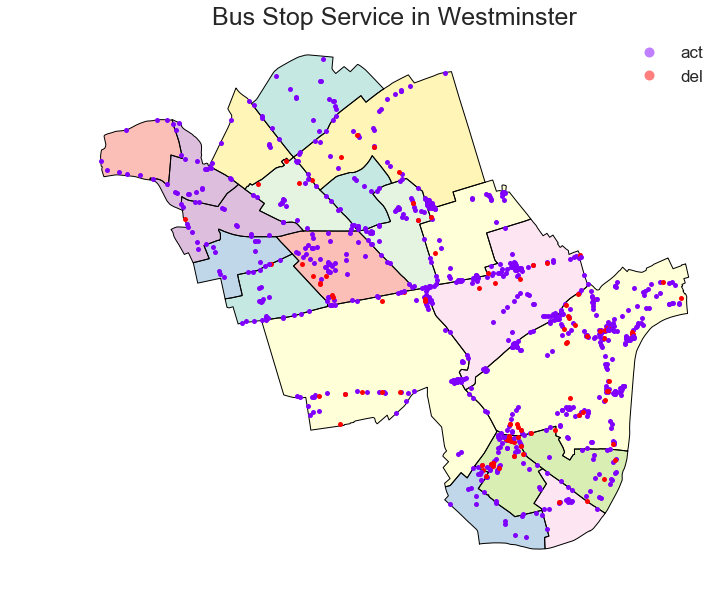

In [7]:
#overlay map plot showing bus operations Westminster
sns.set(font_scale=1.7)
base = complete_wards.plot(figsize=(15,10),cmap='Set3', legend=True)
stop_join.plot(ax=base, marker='o', cmap='rainbow', markersize=5, column='Status',legend=True)
plt.title('Bus Stop Service in Westminster', fontsize=25)
a_ = plt.axis('off')
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/bustop.png')

# SECTION B

This section selects bus stop operation between evening and night-time. I selected evening time as 18:00 and night-time
as 24:00, as it did not extend past midnight.

In [9]:
#selecting attribute to split record entry
dt_time_split = stop.ix[:,['ModificationDateTime']]

In [10]:
#splitting date and time 
dt_time_split['Date'],dt_time_split['Time'] = dt_time_split['ModificationDateTime'].str.split('T').str

In [11]:
#dropping ModificationDateTime column 
dt_time_split = dt_time_split.drop('ModificationDateTime',axis=1)

In [12]:
#selecting attributes of interest
stops = stop.ix[:, ['Street','Town','Longitude','Latitude','TimingStatus','Status','CommonName']]

In [13]:
#adding date and time columns extracted from ModificationDateTime column
stops = pd.concat([stops,dt_time_split],axis=1)

In [14]:
#selecting hours after 6pm 
stop_df = stops[stops['Time'].between('18:00:00', '24:00:00', inclusive=True)]

In [15]:
#creating geometry column to contain points of geometry
stop_df['geometry'] = [Point(xy) for xy in zip(stop_df.Longitude, stop_df.Latitude)]
#assigning CRS to the geodataframe 
stop_df_geo = gpd.GeoDataFrame(stop, crs={'init' :'epsg:4326'})
#setting CRS to same reference for both dataframes
stop_df_geo = stop_df_geo.to_crs(complete_wards.crs)
#performing a spatial join on the two dataframes
stop_df_join = gpd.sjoin(stop_df_geo, complete_wards, how="inner", op='intersects')

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


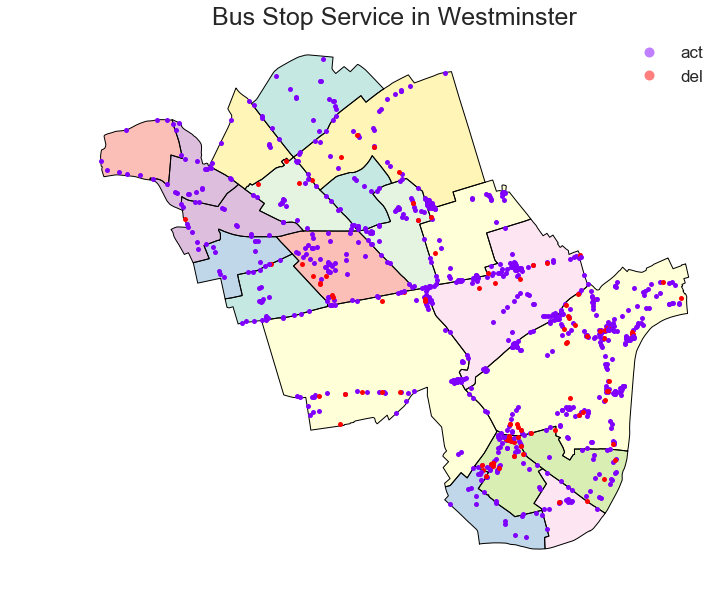

In [16]:
#overlay map plot showing bus operations Westminster
sns.set(font_scale=1.7)
base = complete_wards.plot(figsize=(15,10),cmap='Set3', legend=True)
stop_df_join.plot(ax=base, marker='o', cmap='rainbow', markersize=5, column='Status',legend=True)
plt.title('Bus Stop Service in Westminster', fontsize=25)
a_ = plt.axis('off')
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/bustop.png')